In [26]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import math
import matplotlib.ticker as mticker

def add_scalebar(ax, length, location=(0.1, 0.95), linewidth=15, text_offset=40):
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    sb_x = x0 + (x1 - x0) * location[0]
    sb_y = y0 + (y1 - y0) * location[1]
    ax.hlines(sb_y, sb_x, sb_x + length, colors="black", linewidth=linewidth, zorder=10)
    ax.text(sb_x + length/2, sb_y - text_offset, f"{length/1000:.1f} km",
            ha="center", va="top", fontsize=15, fontweight="bold", color="black", zorder=10)

def add_north_arrow(ax, location=(0.1, 0.1), height=0.1):
    ax.annotate("",
                xy=(location[0], location[1] + height),
                xytext=location,
                arrowprops=dict(arrowstyle="->", color='black', lw=10, mutation_scale=20),
                xycoords="axes fraction")
    ax.text(location[0], location[1] + height, "N",
            transform=ax.transAxes, ha="center", va="bottom", fontsize=30, fontweight="bold", color="black")

# Custom tick formatter: convert EPSG:3857 x (meters) to approximate longitude (degrees)
def make_x_formatter(decimals=2):
    fmt = f"{{:.{decimals}f}}"
    def x_formatter(x, pos):
        return fmt.format(x/6378137*180/math.pi)
    return x_formatter

def make_y_formatter(decimals=2):
    fmt = f"{{:.{decimals}f}}"
    def y_formatter(y, pos):
        lat = (math.pi/2 - 2*math.atan(math.exp(-y/6378137)))*180/math.pi
        return fmt.format(lat)
    return y_formatter


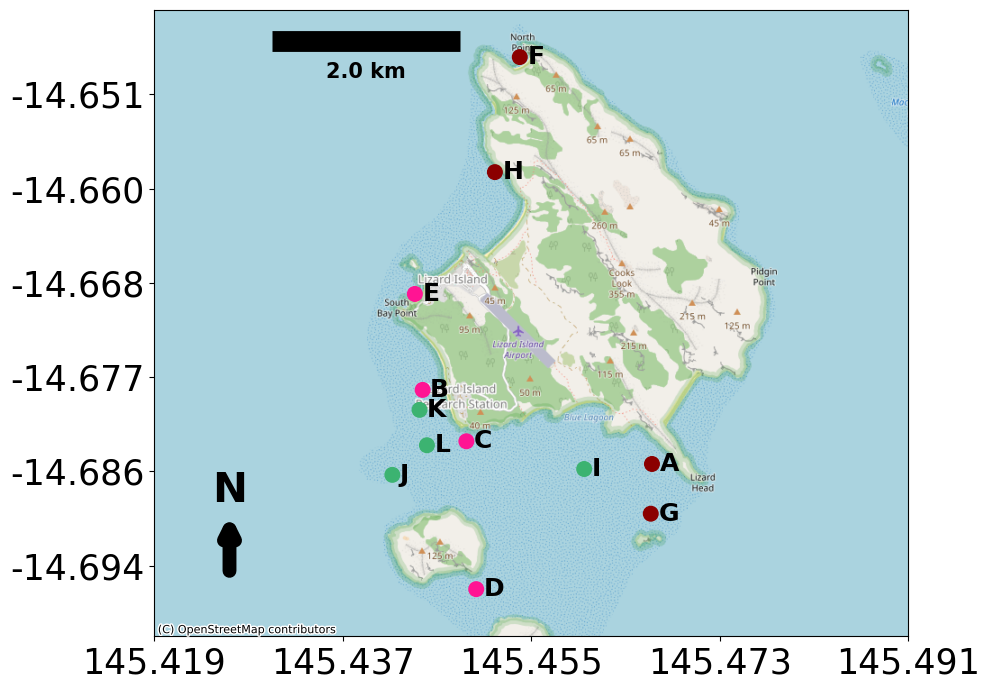

In [85]:
# Lizard island map
data = {
    "name": ["A", "I", "F", "H", "E", "G", "B", "J", "D", "C", "L", "K"],
    "lon": [145.466733, 145.460271, 145.454133, 145.451762, 145.444134, 
            145.466618, 145.444876, 145.441986, 145.449982, 145.449043,
            145.445283, 145.44458],
    "lat": [-14.684977, -14.685441, -14.647456, -14.658067, -14.6693,
            -14.689562, -14.678148, -14.685979, -14.696519, -14.682886,
            -14.683251, -14.679985]
}
df = pd.DataFrame(data)

# Create a GeoDataFrame in EPSG:4326 then convert to EPSG:3857
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Compute original bounds with a buffer (in meters)
buffer = 500
xmin, ymin, xmax, ymax = gdf.total_bounds
xmin, ymin, xmax, ymax = xmin - buffer, ymin - buffer, xmax + buffer, ymax + buffer

# Compute the center and half-width/height for a square
xmid = (xmin + xmax) / 2
ymid = (ymin + ymax) / 2
half_extent = max(xmax - xmin, ymax - ymin) / 2

# Set new square limits
square_xlim = (xmid - half_extent, xmid + half_extent)
square_ylim = (ymid - half_extent, ymid + half_extent)

fig, ax = plt.subplots(figsize=(10, 10))

# Define colours for each point
colors = ['darkred', 'mediumseagreen', 'darkred', 'darkred', 'deeppink',
          'darkred', 'deeppink', 'mediumseagreen', 'deeppink', 'deeppink',
          'mediumseagreen', 'mediumseagreen']

# Plot points
gdf.plot(ax=ax, color=colors, markersize=110, zorder=5)

# Add labels with offset
for idx, row in gdf.iterrows():
    offset_x, offset_y = 80, 0  # increased horizontal gap
    ax.annotate(
        row["name"],
        xy=(row.geometry.x, row.geometry.y),
        xytext=(row.geometry.x + offset_x, row.geometry.y + offset_y),
        fontsize=18, fontweight="bold", color="black",
        ha='left', va='center', textcoords="data", zorder=6
    )

ax.set_xlim(square_xlim)
ax.set_ylim(square_ylim)
ax.set_aspect('equal', adjustable='box')

# Add a basemap
try:
    basemap_provider = ctx.providers.Stamen.Terrain
except AttributeError:
    basemap_provider = ctx.providers.OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=basemap_provider)

# Add north arrow and scale bar
add_north_arrow(ax, height=0.1)
add_scalebar(ax, length=2000, text_offset=220)

# Set axis labels in bold
# ax.set_xlabel("Longitude", fontsize=22, fontweight="bold") # add in powerpoint
# ax.set_ylabel("Latitude", fontsize=22, fontweight="bold") # add in powerpoint
ax.tick_params(axis='both', labelsize=25)

# Add the decimal degree labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(make_x_formatter(decimals=3)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(make_y_formatter(decimals=3)))

# set xticks every 2
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])

plt.tight_layout()
plt.show()


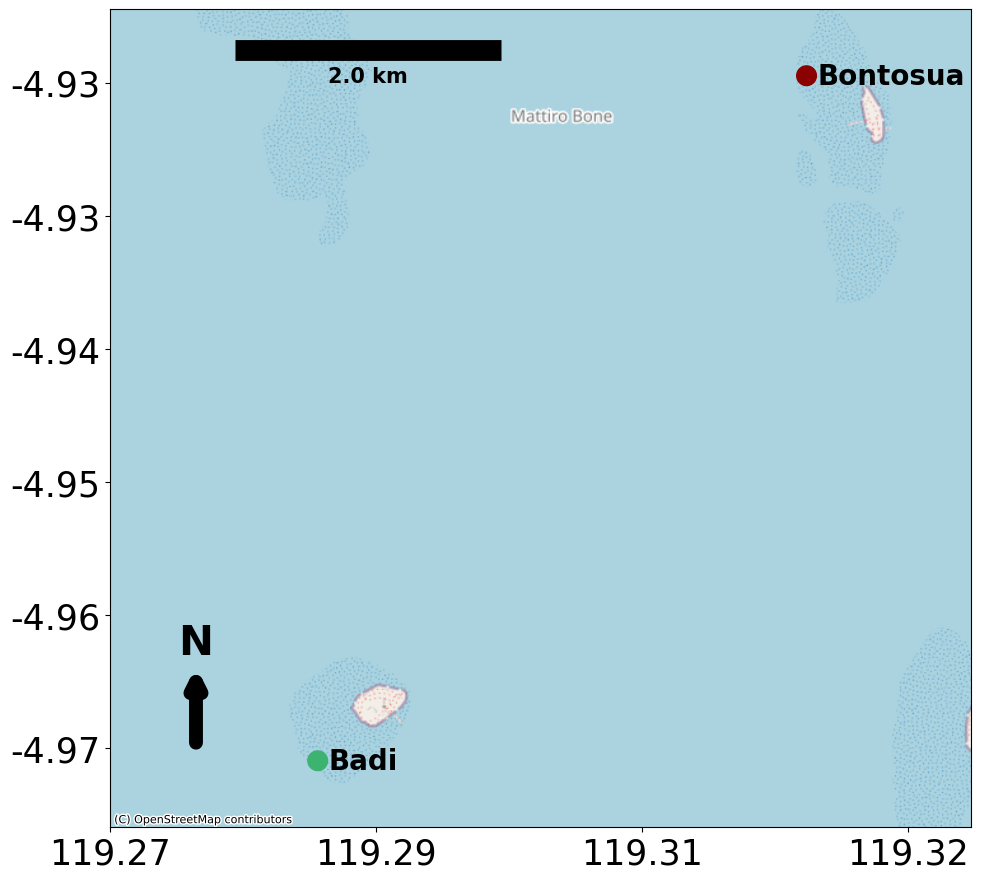

In [88]:
### Indo
data = {
    "name": ["Bontosua", "Badi"],
    "lon": [119.316345, 119.283350],
    "lat": [-4.925207, -4.971270]
}
df = pd.DataFrame(data)

# Create a GeoDataFrame in EPSG:4326 then convert to EPSG:3857
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Determine a Square Extent
buffer = 500  # in meters
xmin, ymin, xmax, ymax = gdf.total_bounds
xmin, ymin, xmax, ymax = xmin - buffer, ymin - buffer, xmax + buffer, ymax + buffer

# Compute the midpoint and half-extent for a square view
xmid = (xmin + xmax) / 2
ymid = (ymin + ymax) / 2
half_extent = max(xmax - xmin, ymax - ymin) / 2
square_xlim = (xmid - half_extent, xmid + half_extent)
square_ylim = (ymid - half_extent, ymid + half_extent)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Use "deeppink" as the point colour (similar to "deeppink2")a
point_color = "deeppink"

# Plot points
gdf.plot(ax=ax, color=colors, markersize=200, zorder=5)

# Add labels with offset
for idx, row in gdf.iterrows():
    offset_x, offset_y = 80, 0  # increased horizontal gap
    ax.annotate(
        row["name"],
        xy=(row.geometry.x, row.geometry.y),
        xytext=(row.geometry.x + offset_x, row.geometry.y + offset_y),
        fontsize=20, fontweight="bold", color="black",
        ha='left', va='center', textcoords="data", zorder=6
    )


ax.set_xlim(square_xlim)
ax.set_ylim(square_ylim)

# Force square aspect ratio
ax.set_aspect('equal', adjustable='box')

# Add a basemap
try:
    basemap_provider = ctx.providers.Stamen.Terrain
except AttributeError:
    basemap_provider = ctx.providers.OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=basemap_provider)

# Add north arrow and scale bar
add_north_arrow(ax, height=0.1)
add_scalebar(ax, length=2000, text_offset=120)

# with bold font
# ax.set_xlabel("Longitude", fontsize=22, fontweight="bold") # add in powerpoint
# ax.set_ylabel("Latitude", fontsize=22, fontweight="bold") # add in powerpoint
ax.tick_params(axis='both', labelsize=25)

# Add the decimal degree labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(make_x_formatter(decimals=2)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(make_y_formatter(decimals=2)))

# set xticks every 2
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])

plt.tight_layout()
plt.show()

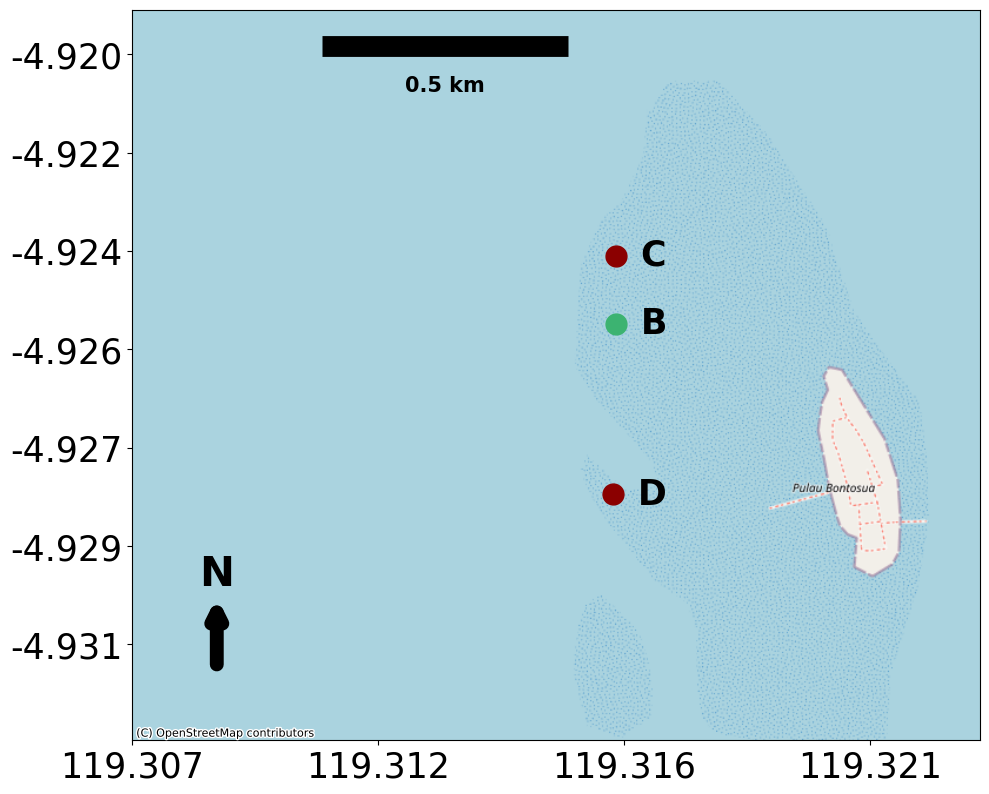

In [111]:
# Prepare Bontosua Map Data
data = {
    "name": ["B", "C", "D"],
    "lon": [119.316345, 119.316338, 119.316282],
    "lat": [-4.925207, -4.923965, -4.928310]
}
df = pd.DataFrame(data)

# Define point colours as per your R code:
# Using "seagreen" for the first point and "sienna" for the other two.
colors = ["mediumseagreen", "darkred", "darkred"]

# Create a GeoDataFrame in EPSG:4326 then convert to EPSG:3857 for basemap compatibility
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Determine Square Extent
buffer = 500  # buffer in meters
xmin, ymin, xmax, ymax = gdf.total_bounds
xmin, ymin, xmax, ymax = xmin - buffer, ymin - buffer, xmax + buffer, ymax + buffer
xmid = (xmin + xmax) / 2
ymid = (ymin + ymax) / 2
half_extent = max(xmax - xmin, ymax - ymin) / 2
square_xlim = (xmid - half_extent, xmid + half_extent)
square_ylim = (ymid - half_extent, ymid + half_extent)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the points individually with their assigned colours
for idx, row in gdf.iterrows():
    ax.plot(row.geometry.x, row.geometry.y, marker='o', color=colors[idx], markersize=15, zorder=5)

# Add bold labels with a small offset and an arrow connecting the point to the label
for idx, row in gdf.iterrows():
    offset_x, offset_y = 50, 0  # increased horizontal gap
    ax.annotate(
        row["name"],
        xy=(row.geometry.x, row.geometry.y),
        xytext=(row.geometry.x + offset_x, row.geometry.y + offset_y),
        fontsize=25, fontweight="bold", color="black",
        ha='left', va='center', textcoords="data", zorder=6
    )


ax.set_xlim(square_xlim)
ax.set_ylim(square_ylim)

# Force square aspect ratio
ax.set_aspect('equal', adjustable='box')

# Add a basemap
try:
    basemap_provider = ctx.providers.Stamen.Terrain
except AttributeError:
    basemap_provider = ctx.providers.OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=basemap_provider)

# Add north arrow and scale bar
add_north_arrow(ax, height=0.1)
add_scalebar(ax, length=500, text_offset=60)

# with bold font
# ax.set_xlabel("Longitude", fontsize=22, fontweight="bold") # add in powerpoint
# ax.set_ylabel("Latitude", fontsize=22, fontweight="bold") # add in powerpoint
ax.tick_params(axis='both', labelsize=25)

# Add the decimal degree labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(make_x_formatter(decimals=3)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(make_y_formatter(decimals=3)))

# set xticks every 2
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])

plt.tight_layout()
plt.show()


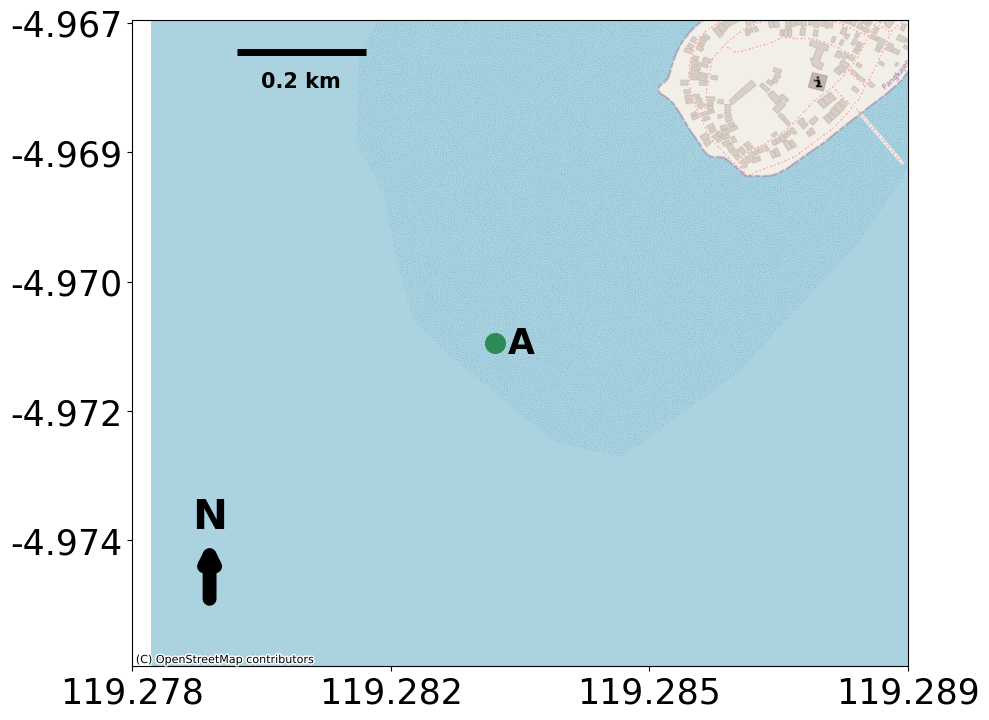

In [127]:

# Prepare Badi Map Data
data = {
    "name": ["A"],
    "lon": [119.283350],
    "lat": [-4.971270]
}
df = pd.DataFrame(data)

# Create a GeoDataFrame (EPSG:4326) then convert to EPSG:3857
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Compute original bounds with a buffer (in meters)
buffer = 500
xmin, ymin, xmax, ymax = gdf.total_bounds
xmin, ymin, xmax, ymax = xmin - buffer, ymin - buffer, xmax + buffer, ymax + buffer

# Compute the center and half-width/height for a square
xmid = (xmin + xmax) / 2
ymid = (ymin + ymax) / 2
half_extent = max(xmax - xmin, ymax - ymin) / 2

# Set new square limits
square_xlim = (xmid - half_extent, xmid + half_extent)
square_ylim = (ymid - half_extent, ymid + half_extent)

fig, ax = plt.subplots(figsize=(10, 10))

# Define colour for the point (using 'seagreen2'-like color; if unavailable, try "seagreen")
point_color = "seagreen"  

# Plot the point
gdf.plot(ax=ax, color=point_color, markersize=200, zorder=5)

# Add label with offset (and an arrow if desired; here we just place the label)
for idx, row in gdf.iterrows():
    offset_x, offset_y = 20, 0  # increased horizontal gap
    ax.annotate(
        row["name"],
        xy=(row.geometry.x, row.geometry.y),
        xytext=(row.geometry.x + offset_x, row.geometry.y + offset_y),
        fontsize=25, fontweight="bold", color="black",
        ha='left', va='center', textcoords="data", zorder=6
    )


ax.set_xlim(square_xlim)
ax.set_ylim(square_ylim)

# Force square aspect ratio
ax.set_aspect('equal', adjustable='box')

# Add a basemap from an open-source provider (Stamen Terrain, fallback to OSM Mapnik)
try:
    basemap_provider = ctx.providers.Stamen.Terrain
except AttributeError:
    basemap_provider = ctx.providers.OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=basemap_provider)

# Add north arrow (top right) and scale bar (top left); scale bar length 200 m
add_north_arrow(ax, height=0.1)
add_scalebar(ax, length=200, linewidth=5, text_offset=30)

# ax.set_xlabel("Longitude", fontsize=22, fontweight="bold") # add in powerpoint
# ax.set_ylabel("Latitude", fontsize=22, fontweight="bold") # add in powerpoint
ax.tick_params(axis='both', labelsize=25)

# Add the decimal degree labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(make_x_formatter(decimals=3)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(make_y_formatter(decimals=3)))

# set xticks every 2
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])

plt.tight_layout()
plt.show()


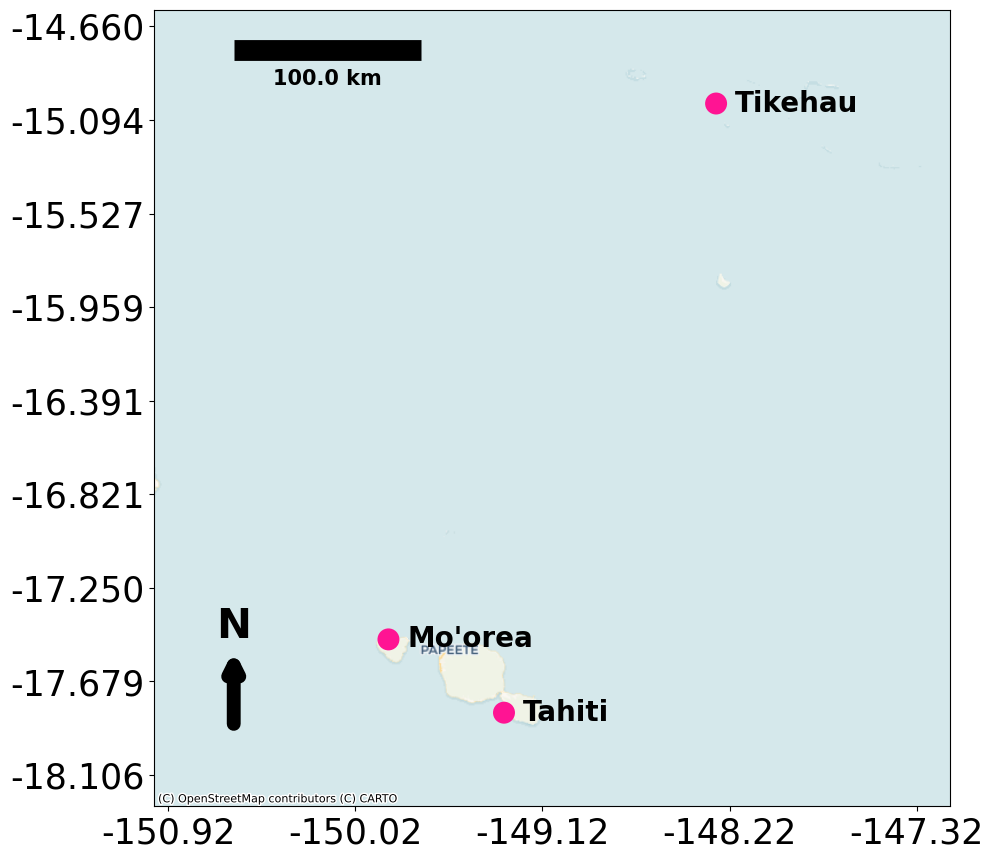

In [119]:
# Polynesia map

# Prepare the data
data_poly = {
    "name": ["Tikehau", "Tahiti", "Mo'orea"],
    "lon": [-148.286400, -149.304283, -149.858767],
    "lat": [-15.017617, -17.821467, -17.486317]
}
df_poly = pd.DataFrame(data_poly)

# Create a GeoDataFrame (EPSG:4326) then convert to EPSG:3857
gdf_poly = gpd.GeoDataFrame(df_poly, geometry=gpd.points_from_xy(df_poly.lon, df_poly.lat), crs="EPSG:4326")
gdf_poly = gdf_poly.to_crs(epsg=3857)

# Because these points are far apart, use a larger buffer (e.g., 50 km)
buffer = 50000  # in meters
xmin, ymin, xmax, ymax = gdf_poly.total_bounds
xmin, ymin, xmax, ymax = xmin - buffer, ymin - buffer, xmax + buffer, ymax + buffer

# Compute the midpoint and half-extent for a square view
xmid = (xmin + xmax) / 2
ymid = (ymin + ymax) / 2
half_extent = max(xmax - xmin, ymax - ymin) / 2
square_xlim = (xmid - half_extent, xmid + half_extent)
square_ylim = (ymid - half_extent, ymid + half_extent)

fig, ax = plt.subplots(figsize=(10, 10))

# Define the point colour (using "deeppink" for all points)
point_color = "deeppink"

# Plot the points, with edgecolor="none" to remove marker outlines
gdf_poly.plot(ax=ax, color=point_color, markersize=250, zorder=5, edgecolor="none")

# Add labels with a fixed offset and connecting arrow for clarity
for idx, row in gdf_poly.iterrows():
    offset_x, offset_y = 10000, 0  # 100 m to the right; no vertical offset
    ax.annotate(row["name"],
                xy=(row.geometry.x, row.geometry.y),
                xytext=(row.geometry.x + offset_x, row.geometry.y + offset_y),
                fontsize=20, fontweight="bold", color="black",
                ha='left', va='center',  # align text so it starts to the right of the point
                zorder=6)


ax.set_xlim(square_xlim)
ax.set_ylim(square_ylim)
ax.set_aspect('equal', adjustable='box')

# Add a basemap from an open-source provider:
try:
    basemap_provider = ctx.providers.CartoDB.Voyager
except AttributeError:
    basemap_provider = ctx.providers.OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=basemap_provider)


# Add north arrow (top right) and scale bar (100 km length)
add_north_arrow(ax, height=0.1)
add_scalebar(ax, length=100000, text_offset=10000)

#ax.set_xlabel("Longitude", fontsize=15, fontweight="bold")
#ax.set_ylabel("Latitude", fontsize=15, fontweight="bold")
ax.tick_params(axis='both', labelsize=25)

# Set decimal degree labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(make_x_formatter(decimals=2)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(make_y_formatter(decimals=3)))


plt.tight_layout()
plt.show()

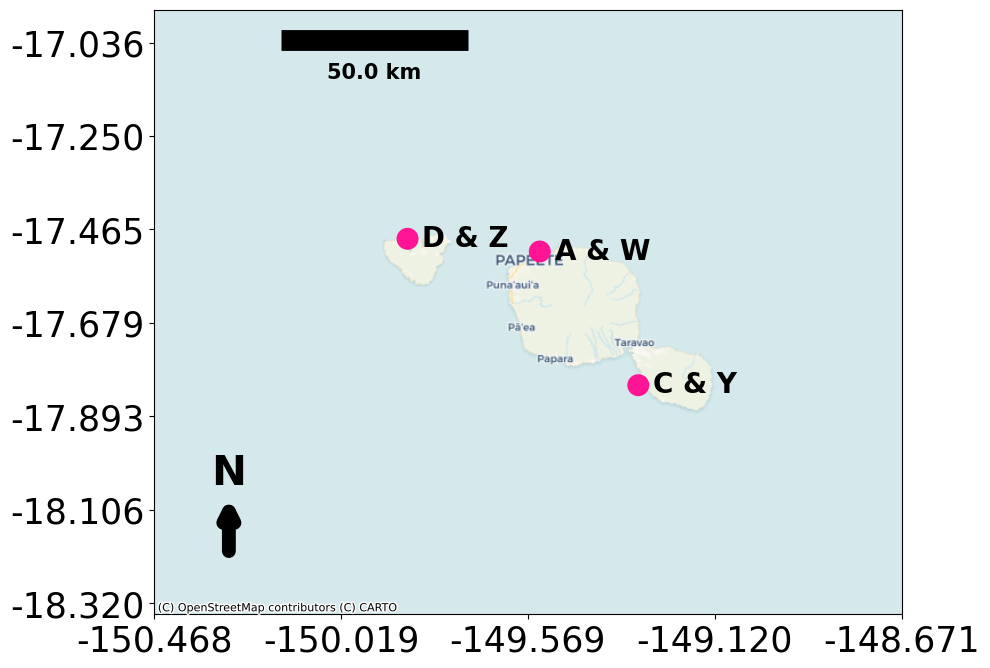

In [135]:
# Polynesia (Moorea and Tahiti) map

data_poly = {
    "name": ["A & W", "C & Y", "D & Z"],
    "lon": [-149.540983, -149.304283, -149.858767],
    "lat": [-17.515350, -17.821467, -17.486317]
}
df_poly = pd.DataFrame(data_poly)
gdf_poly = gpd.GeoDataFrame(df_poly, geometry=gpd.points_from_xy(df_poly.lon, df_poly.lat), crs="EPSG:4326")
gdf_poly = gdf_poly.to_crs(epsg=3857)

# Compute bounds with a large buffer (50 km) since points are spread out
buffer = 50000  # in meters
xmin, ymin, xmax, ymax = gdf_poly.total_bounds
xmin, ymin, xmax, ymax = xmin - buffer, ymin - buffer, xmax + buffer, ymax + buffer

# Force a square extent by computing the midpoint and half-extent
xmid = (xmin + xmax) / 2
ymid = (ymin + ymax) / 2
half_extent = max(xmax - xmin, ymax - ymin) / 2
square_xlim = (xmid - half_extent, xmid + half_extent)
square_ylim = (ymid - half_extent, ymid + half_extent)

fig, ax = plt.subplots(figsize=(10, 10))

# Use "deeppink" for all points
point_color = "deeppink"

# Plot the points, with edgecolor="none" to remove marker outlines
gdf_poly.plot(ax=ax, color=point_color, markersize=250, zorder=5, edgecolor="none")

# Add labels with a fixed offset and connecting arrow for clarity
for idx, row in gdf_poly.iterrows():
    offset_x, offset_y = 4000, 0  # 100 m to the right; no vertical offset
    ax.annotate(row["name"],
                xy=(row.geometry.x, row.geometry.y),
                xytext=(row.geometry.x + offset_x, row.geometry.y + offset_y),
                fontsize=20, fontweight="bold", color="black",
                ha='left', va='center',  # align text so it starts to the right of the point
                zorder=6)

ax.set_xlim(square_xlim)
ax.set_ylim(square_ylim)
ax.set_aspect("equal", adjustable="box")

# Add a basemap from an open-source provider:
try:
    basemap_provider = ctx.providers.CartoDB.Voyager
except AttributeError:
    basemap_provider = ctx.providers.OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=basemap_provider)

# Add north arrow (top right) and a scale bar (20 km)
add_north_arrow(ax, height=0.1)
add_scalebar(ax, length=50000, text_offset=6000)

#ax.set_xlabel("Longitude", fontsize=15, fontweight="bold")
#ax.set_ylabel("Latitude", fontsize=15, fontweight="bold")
ax.tick_params(axis="both", labelsize=25)


# Set decimal degree labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(make_x_formatter(decimals=3)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(make_y_formatter(decimals=3)))

# set xticks every 2
ticks = ax.get_xticks()
ax.set_xticks(ticks[::2])

plt.tight_layout()
plt.show()

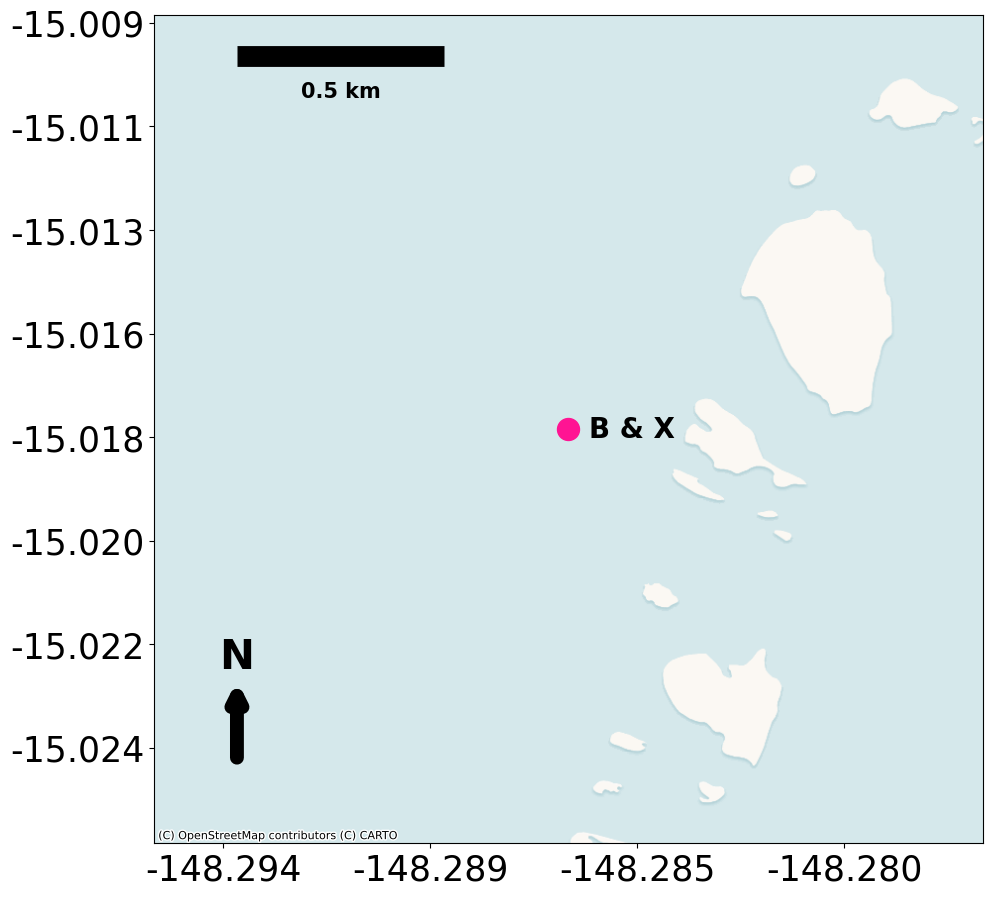

In [134]:
# Tikehau map

data_tikehau = {
    "name": ["B & X"],
    "lon": [-148.286400],
    "lat": [-15.017617]
}
df_tikehau = pd.DataFrame(data_tikehau)
gdf_tikehau = gpd.GeoDataFrame(df_tikehau, geometry=gpd.points_from_xy(df_tikehau.lon, df_tikehau.lat), crs="EPSG:4326")
gdf_tikehau = gdf_tikehau.to_crs(epsg=3857)

# Use a larger buffer since zoom level is lower (zoom=13 equivalent)
buffer = 1000  # in meters
xmin, ymin, xmax, ymax = gdf_tikehau.total_bounds
xmin, ymin, xmax, ymax = xmin - buffer, ymin - buffer, xmax + buffer, ymax + buffer

# Force square extent
xmid = (xmin + xmax) / 2
ymid = (ymin + ymax) / 2
half_extent = max(xmax - xmin, ymax - ymin) / 2
square_xlim = (xmid - half_extent, xmid + half_extent)
square_ylim = (ymid - half_extent, ymid + half_extent)

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the point (using "deeppink" as a substitute for "deeppink2")
point_color = "deeppink"
gdf_tikehau.plot(ax=ax, color=point_color, markersize=250, zorder=5)

# Add label with a 50 m offset and a connecting arrow
for idx, row in gdf_tikehau.iterrows():
    offset_x, offset_y = 50, 0
    ax.annotate(row["name"],
                xy=(row.geometry.x, row.geometry.y),
                xytext=(row.geometry.x + offset_x, row.geometry.y + offset_y),
                fontsize=20, fontweight="bold", color="black",
                ha='left', va='center',  # align text so it starts to the right of the point
                zorder=6)

ax.set_xlim(square_xlim)
ax.set_ylim(square_ylim)
ax.set_aspect("equal", adjustable="box")

# Add a basemap from an open-source provider:
try:
    basemap_provider = ctx.providers.CartoDB.Voyager
except AttributeError:
    basemap_provider = ctx.providers.OpenStreetMap.Mapnik
ctx.add_basemap(ax, source=basemap_provider)

# Add north arrow and scale bar (scale bar length: 2000 m)
add_north_arrow(ax, height=0.1)
add_scalebar(ax, length=500, text_offset=60)

#ax.set_xlabel("Longitude", fontsize=15, fontweight="bold")
#ax.set_ylabel("Latitude", fontsize=15, fontweight="bold")
ax.tick_params(axis="both", labelsize=25)

# Set decimal degree labels
ax.xaxis.set_major_formatter(mticker.FuncFormatter(make_x_formatter(decimals=3)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(make_y_formatter(decimals=3)))

plt.tight_layout()
plt.show()

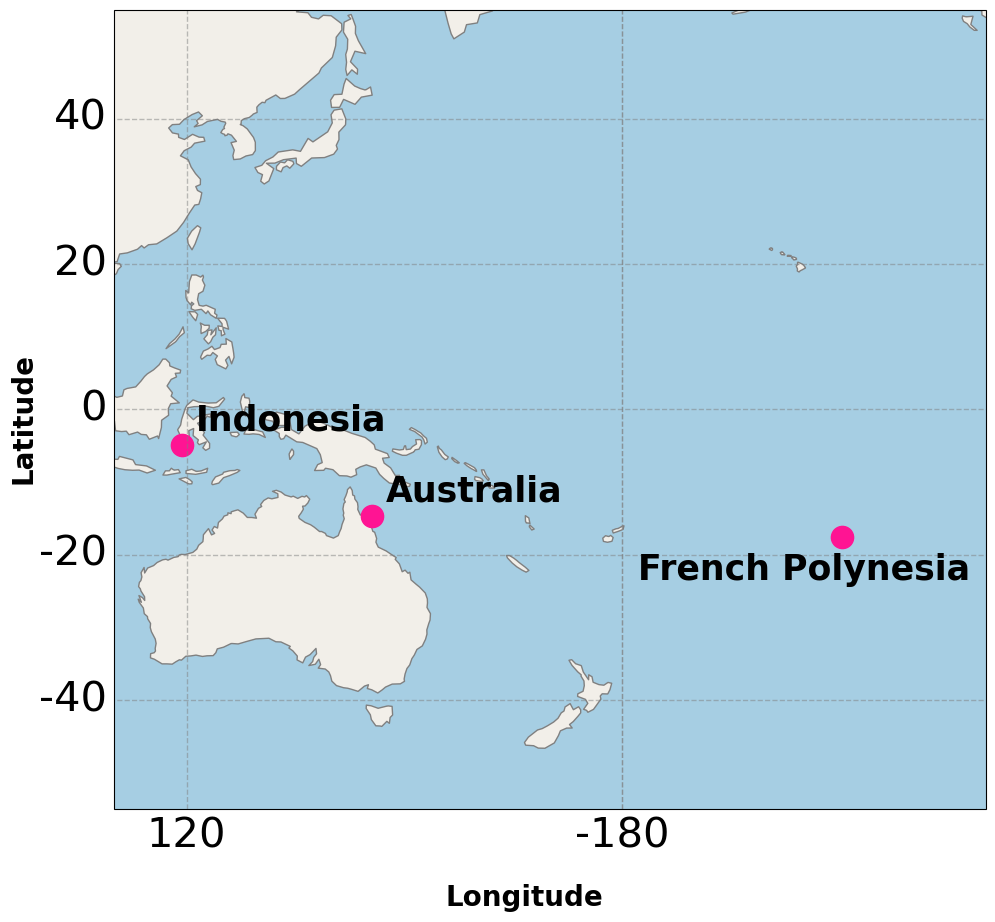

In [73]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import pandas as pd
import matplotlib.ticker as mticker

# Data for world points
data_world = {
    "name": ["French Polynesia", "Australia", "Indonesia"],
    "lon": [-149.82, 145.46, 119.3],
    "lat": [-17.53, -14.689562, -4.94]
}
df_world = pd.DataFrame(data_world)

# Use PlateCarree with central_longitude=180 for Pacific centering
proj = ccrs.PlateCarree(central_longitude=180)
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=proj)

# Set square extent (longitudes first, then latitudes)
ax.set_extent([110, 230, -55, 55], crs=ccrs.PlateCarree())

# Add Natural Earth features with a light OSM-like style
ax.add_feature(cfeature.LAND, facecolor='#f2efe9')
ax.add_feature(cfeature.OCEAN, facecolor='#a6cee3')
ax.add_feature(cfeature.COASTLINE, edgecolor='gray')

# Plot each point and add labels with offsets.
for idx, row in df_world.iterrows():
    # Plot the point
    ax.plot(row['lon'], row['lat'], marker='o', color='deeppink', markersize=16,
            transform=ccrs.PlateCarree())
    # For French Polynesia, use a bottom-left offset; for others, top-right.
    if row["name"] == "French Polynesia":
        dx, dy = -28, -6  # degrees
    else:
        dx, dy = 2, 2
    ax.text(row['lon'] + dx, row['lat'] + dy, row['name'],
            fontsize=25, weight='bold', color='black', transform=ccrs.PlateCarree())

# Add gridlines with decimal degree labels
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

gl.xformatter = mticker.FuncFormatter(lambda x, pos: f"{x:.0f}")
gl.yformatter = mticker.FuncFormatter(lambda y, pos: f"{y:.0f}")
gl.xlabel_style = {'size': 30, 'color': 'black'}
gl.ylabel_style = {'size': 30, 'color': 'black'}

# Add axis labels in bold
# ax.set_xlabel("Longitude", fontsize=22, fontweight="bold") # add in powerpoint
# ax.set_ylabel("Latitude", fontsize=22, fontweight="bold") # add in powerpoint

plt.tight_layout()

# Axis titles
fig.text(0.5, 00.02, "Longitude", ha="center", va="center", fontsize=20, fontweight="bold")
fig.text(0, 0.5, "Latitude", ha="center", va="center", rotation="vertical", fontsize=20, fontweight="bold")

plt.show()
